# Results for local code

## 0. Load libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st
import pickle
import seaborn as sns   

#%matplotlib inline

## 1. Initialize variables

In [2]:
recalculate_if_saved = False
# repetitions = 26
repetitions = 13
number_of_updates = 150
algorithm_list = ['corrective', 'standard', 'preventive']
types_list = ['concurrent']
delay_list = ['1', '10', '100', '1000', '10000']
repetition_probability_list = ['0']
negation_probability_list = ['0', '5', '10', '20', '40', '80']
file_path = 'local/test/results_experiment_'
new_columns_metrics = ['inconsistencies', 
                       'messages_sent', 
                       'latency_per_operation', 
                       'overhead_data_structure', 
                       'overhead_per_message', 
                       'number_of_reconfigurations', 
                       'total_reconfiguration_time',
                       'result_algorithm',
                       'type',
                       'negation_probability',
                       'delay',
                       'repetition_probability',
                       'update']
file_path_images = '/images/seaborn/'
type_exp = 'concurrent'
current_directory = os.getcwd()
all_results = pd.DataFrame(columns=new_columns_metrics)

In [3]:
def save_all_dataframes_as_pickle(all_results):
    print('Saving....')
    current_directory = os.getcwd()
    path_results = '/saved_dataframes/'
    string_name = 'data_frame_'
    pickle.dump(all_results, open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'wb'))
    print('Saved!')

In [4]:
def calculate_values(all_results):    
    new_number = number_of_updates
    one_time_print = False
    for repetition_index in range(0, repetitions + 1):
        file_path = 'local/test/results_experiment_' + str(new_number)
        data = dict()
        data['update'] = number_of_updates * (repetition_index + 1)
        for delay in delay_list:
            data['delay'] = delay
            for repetition_probability in repetition_probability_list:
                data['repetition'] = repetition_probability
                for negation_probability in negation_probability_list:
                    data['negation'] = negation_probability
                    for algorithm in algorithm_list:
                        data['algorithm'] = algorithm
                        for alg_type in types_list:  
                            data['alg_type'] = alg_type
                            str_1 = 'result_algorithm_*' + algorithm + '*_type_*' + alg_type + '*_negationProbability_*' + str(negation_probability)
                            str_2 = '*_delay_*' + str(delay) + '.0*_repetitionProbability_*' + str(repetition_probability) + '*.csv'
                            file_name = str_1 + str_2
                            try:
                                result = pd.read_csv(file_path +'/' + file_name, encoding='utf-8', sep=r'\s*,\s*', header=0, engine='python')                                                                
                                result['result_algorithm'] = [algorithm]*len(result)
                                result['type'] = [alg_type]*len(result)
                                result['negation_probability'] = [str(negation_probability)]*len(result)
                                result['delay'] = [str(delay)]*len(result)
                                result['repetition_probability'] = [str(repetition_probability)]*len(result)
                                result['update'] = [str( data['update'])]*len(result)
#                                 as.data.frame(lapply(result, function(x) x[-which.max(x)]))
#                                 as.data.frame(lapply(result, function(x) x[-which.min(x)]))
#                                 print(result.max())
                                for index, row in result.iterrows():                                           
                                    all_results = all_results.append(row, ignore_index=True)                                      
                            except FileNotFoundError as e:
                                print(e)

        new_number += number_of_updates
    save_all_dataframes_as_pickle(all_results)
    return all_results

In [5]:
def load_values():
    print('Loading...')
    path_results = '/saved_dataframes/'
    current_directory = os.getcwd()
    loaded_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'rb'))
    print('Loaded!')
    return loaded_data

In [6]:
if recalculate_if_saved:
    all_results = calculate_values(all_results)
else:
    all_results = load_values()
    
# all_results

Saving....
Saved!


## 2. Plot all metrics

### Auxiliary function to plot 

In [7]:
def plot_results(data, metric, string_name_png, string_name_eps, label):
    
    # Select results based on negation probability
    mid_results_01_negation_00 = data.loc[(mid_results['negation_probability'].isin(['0']))]
    mid_results_01_negation_05 = data.loc[(mid_results['negation_probability'].isin(['5']))]
    mid_results_01_negation_10 = data.loc[(mid_results['negation_probability'].isin(['10']))]
    mid_results_01_negation_20 = data.loc[(mid_results['negation_probability'].isin(['20']))]
    mid_results_01_negation_40 = data.loc[(mid_results['negation_probability'].isin(['40']))]
    mid_results_01_negation_80 = data.loc[(mid_results['negation_probability'].isin(['80']))]

    fig_mid, ax_mid = plt.subplots(2, 3, figsize=(25,13))
    g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
    g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
    g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
    g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
    g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
    g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

    fig_mid.tight_layout(pad=4.0)

    g_00_mid.set(ylabel=label)
    g_05_mid.set(ylabel=label)
    g_10_mid.set(ylabel=label)
    g_20_mid.set(ylabel=label)
    g_40_mid.set(ylabel=label)
    g_80_mid.set(ylabel=label)

    g_00_mid.set(xlabel='Reconfigurations')
    g_05_mid.set(xlabel='Reconfigurations')
    g_10_mid.set(xlabel='Reconfigurations')
    g_20_mid.set(xlabel='Reconfigurations')
    g_40_mid.set(xlabel='Reconfigurations')
    g_80_mid.set(xlabel='Reconfigurations')

    ax_mid[0,0].tick_params(labelrotation=45)
    ax_mid[0,1].tick_params(labelrotation=45)
    ax_mid[0,2].tick_params(labelrotation=45)
    ax_mid[1,0].tick_params(labelrotation=45)
    ax_mid[1,1].tick_params(labelrotation=45)
    ax_mid[1,2].tick_params(labelrotation=45)

    ax_mid[0,0].set_title('Negation 0%')
    ax_mid[0,1].set_title('Negation 5%')
    ax_mid[0,2].set_title('Negation 10%')
    ax_mid[1,0].set_title('Negation 20%')
    ax_mid[1,1].set_title('Negation 40%')
    ax_mid[1,2].set_title('Negation 80%')

    sns.despine()

    plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=200.0, bbox_inches='tight', pad_inches=0)
    plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=200.0, bbox_inches='tight', pad_inches=0)


### 2.1.0 Define the path to save images

### 2.1 Plot overhead per message

#### 2.1.1. Ideal Conditions

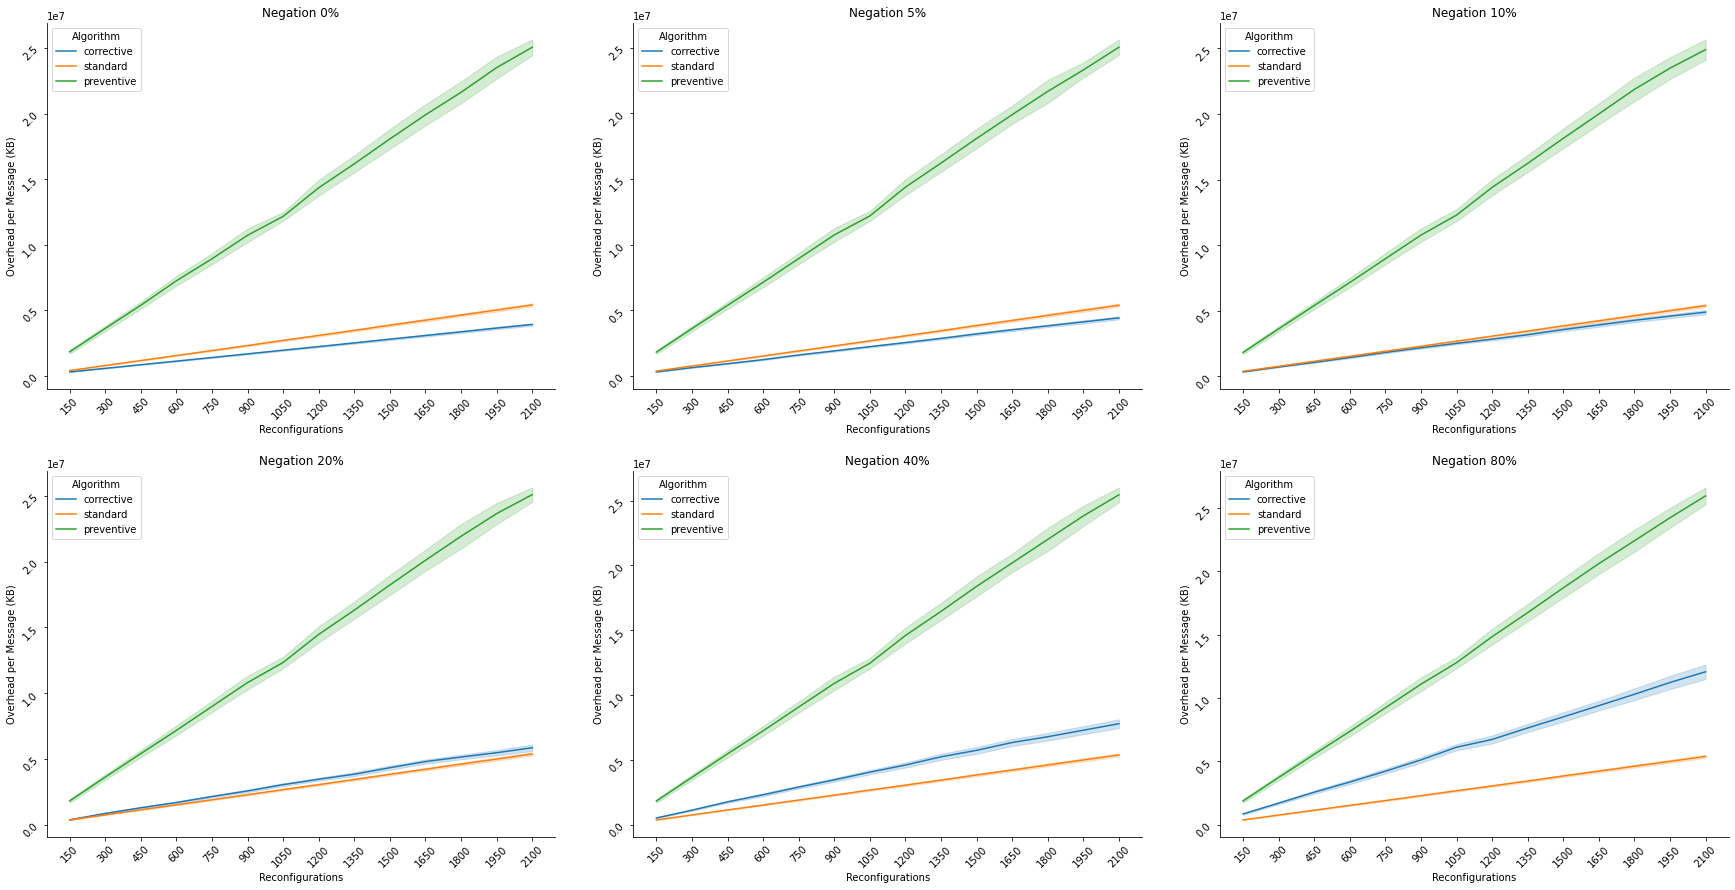

In [8]:
condition = 'ideal'
metric = 'overhead_per_message'
type_exp = 'concurrent'
label = 'Overhead per Message (KB)'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)
    
# Change the name to enhance readibility
all_results.rename(columns={'result_algorithm':'Algorithm'}, inplace=True)

# mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]
# mid_results = all_results.loc[(all_results['delay'].isin(['1','10','100','1000','10000','100000']))]
mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

# Divide the values by 1000 to enhance readibility 
mid_results['overhead_per_message'].div(1000.0).round(3)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]

# display(mid_results_filtered.shape)

# display(type(mid_results_filtered.max()))
# display(mid_results_filtered.idxmax())
# display(mid_results_filtered.shape)

plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.1.2. Mid Conditions

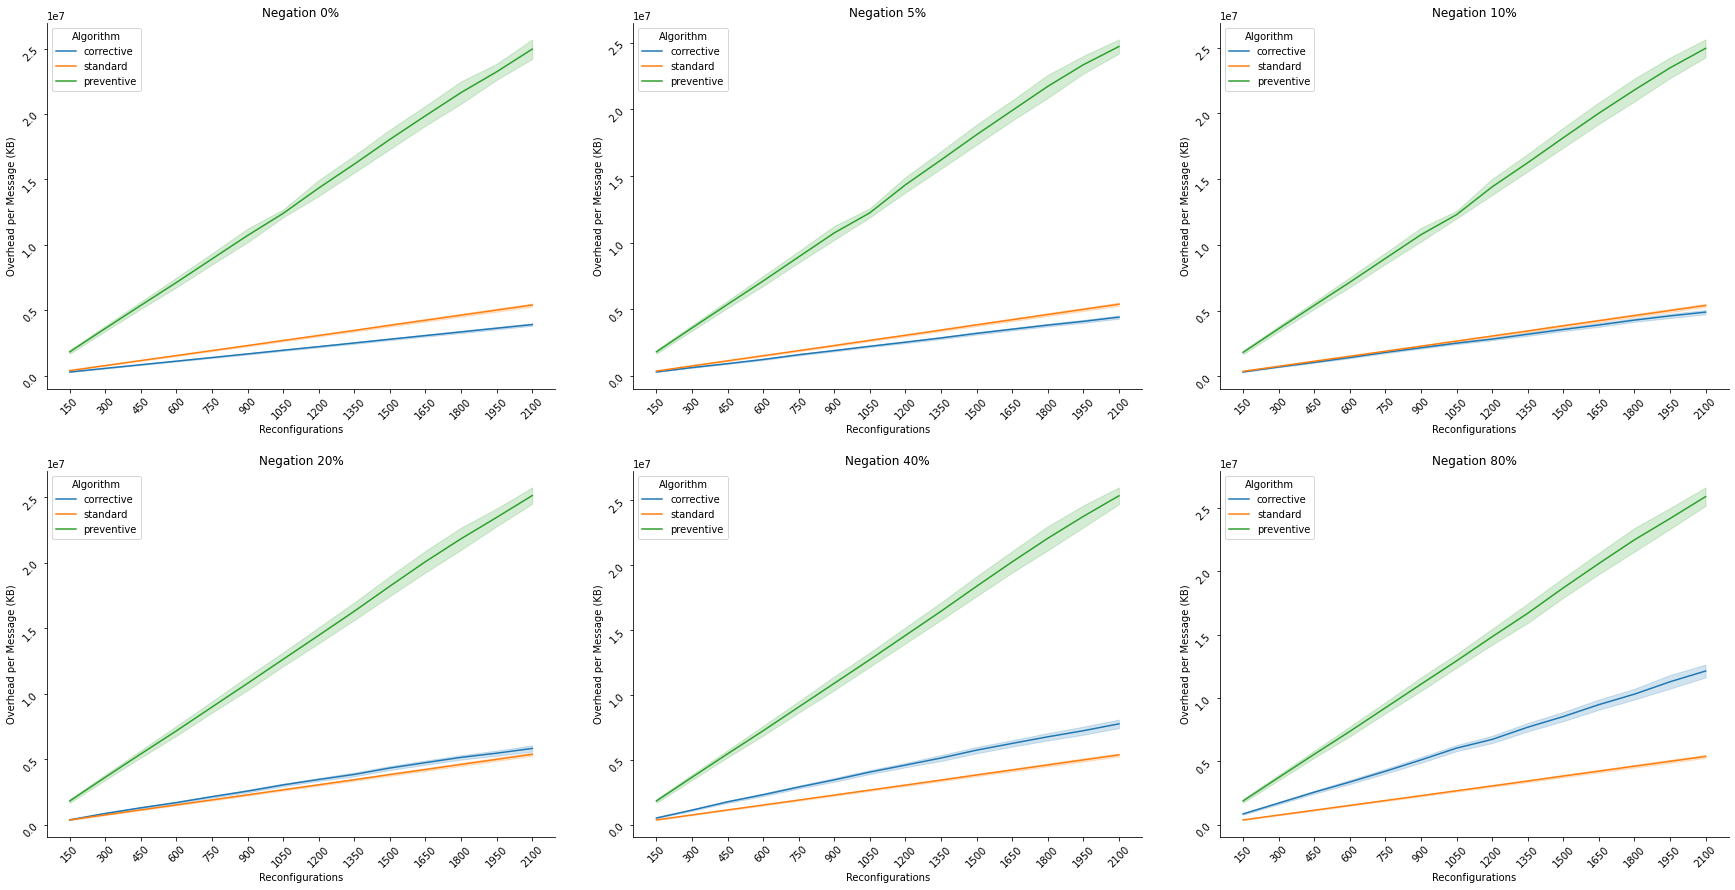

In [9]:
condition = 'middl'
metric = 'overhead_per_message'
type_exp = 'concurrent'
label = 'Overhead per Message (KB)'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)
    
# Change the name to enhance readibility
all_results.rename(columns={'result_algorithm':'Algorithm'}, inplace=True)

# mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]
# mid_results = all_results.loc[(all_results['delay'].isin(['1','10','100','1000','10000','100000']))]
mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

# Divide the values by 1000 to enhance readibility 
mid_results['overhead_per_message'].div(1000.0).round(3)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.1.3 Worst Conditions

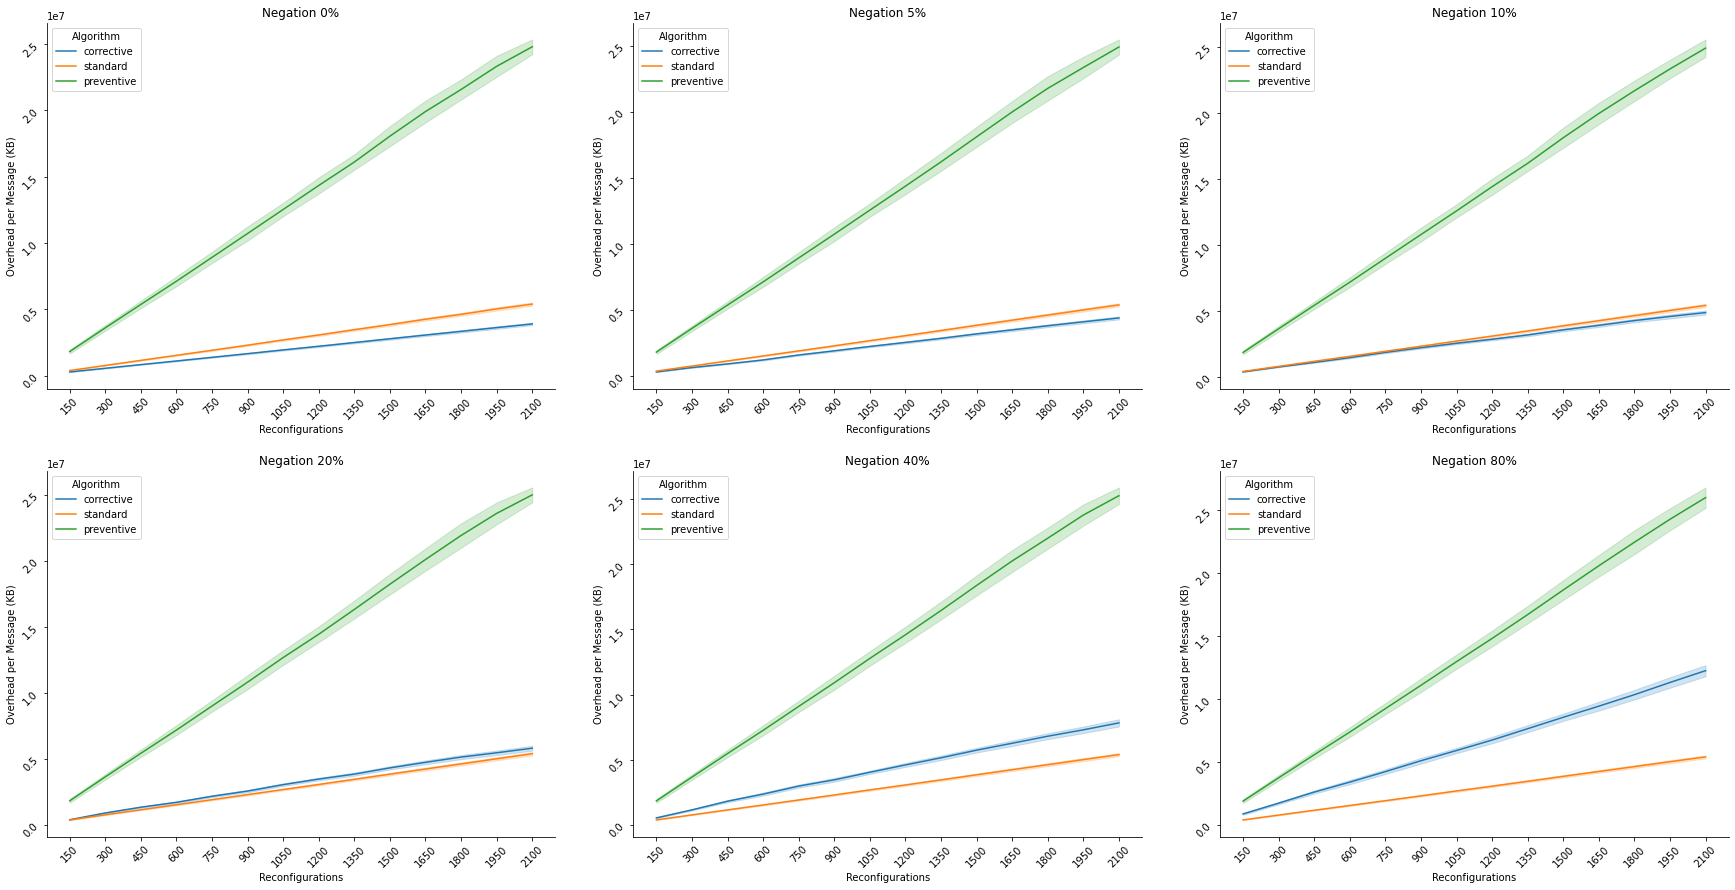

In [10]:
metric = 'overhead_per_message'
type_exp = 'concurrent'
label = 'Overhead per Message (KB)'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)
    
# Change the name to enhance readibility
all_results.rename(columns={'result_algorithm':'Algorithm'}, inplace=True)

# mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]
# mid_results = all_results.loc[(all_results['delay'].isin(['1','10','100','1000','10000','100000']))]
mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

# Divide the values by 1000 to enhance readibility 
mid_results['overhead_per_message'].div(1000.0).round(3)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]

# display(mid_results_filtered.shape)

# display(type(mid_results_filtered.max()))
# display(mid_results_filtered.idxmax())
# display(mid_results_filtered.shape)

plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.2 Plot messages sent

#### 2.2.1 Ideal conditons

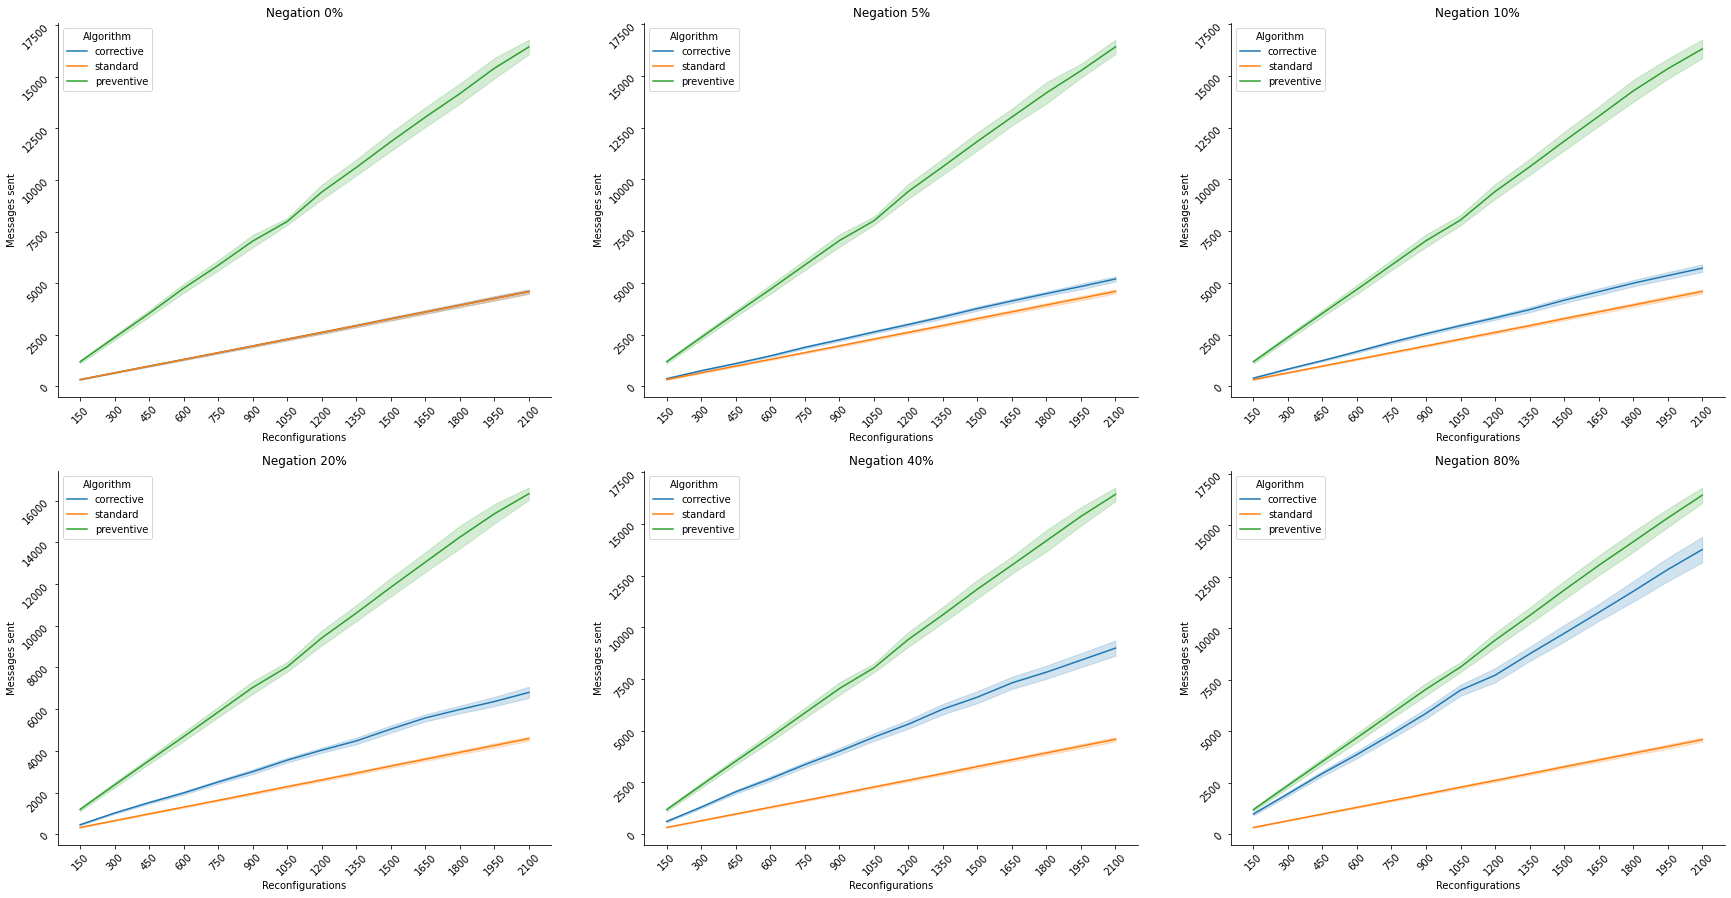

In [11]:
metric = 'messages_sent'
type_exp = 'concurrent'
label = 'Messages sent'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.2.2 Middle conditions

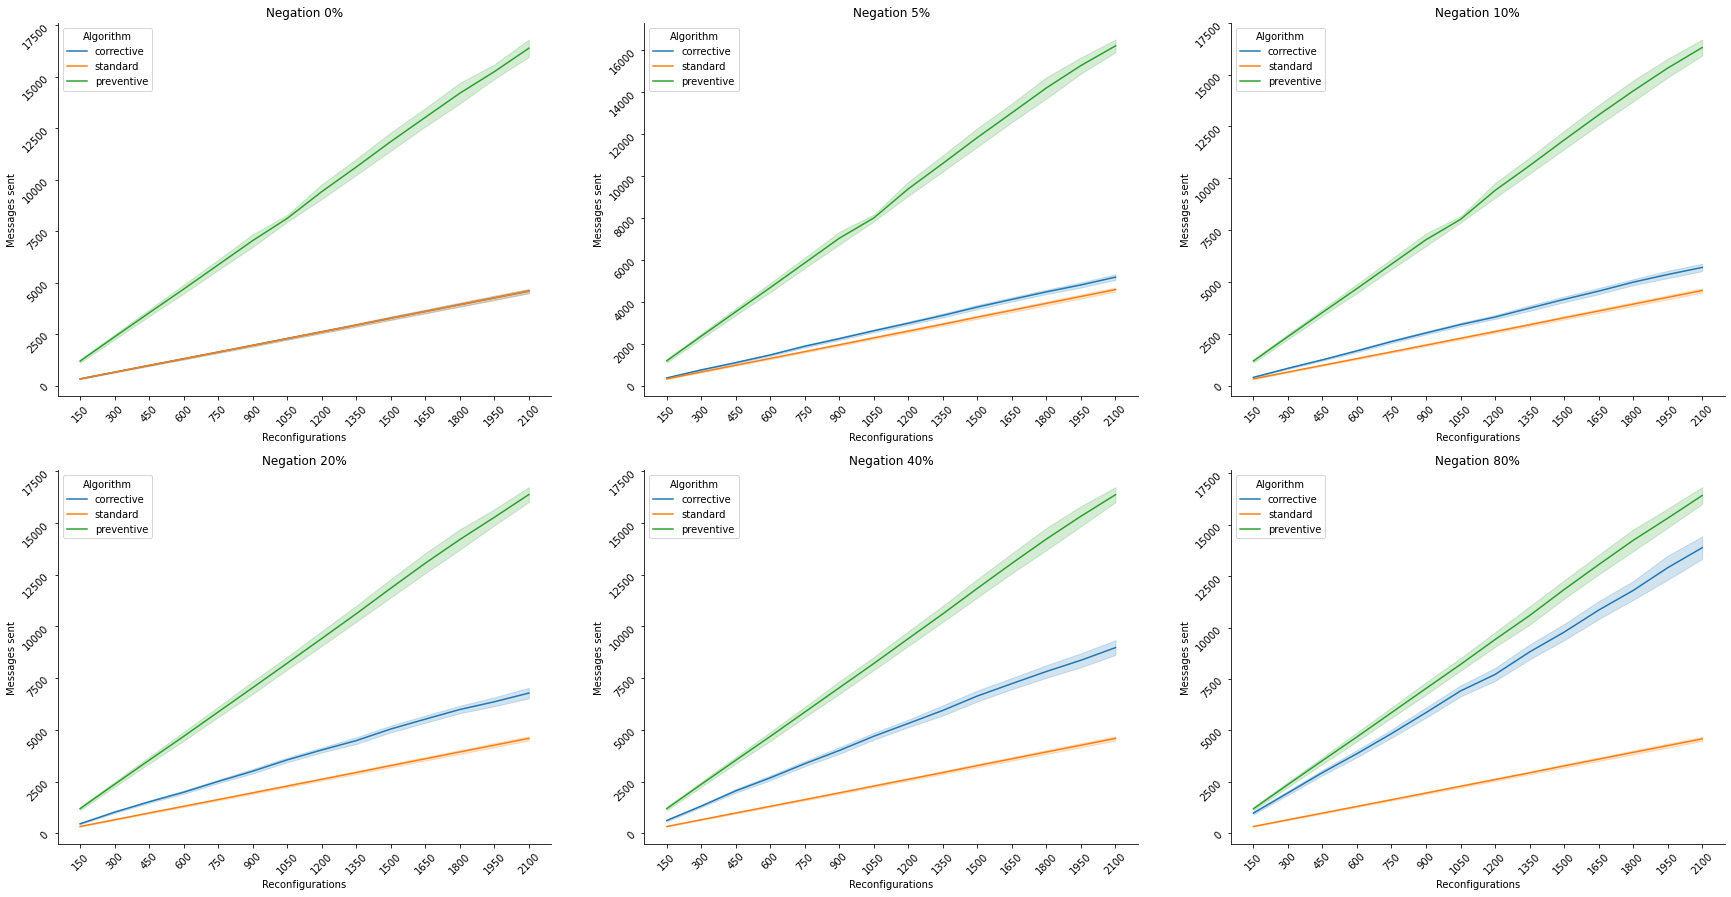

In [12]:
metric = 'messages_sent'
type_exp = 'concurrent'
label = 'Messages sent'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.2.3 Worst conditons

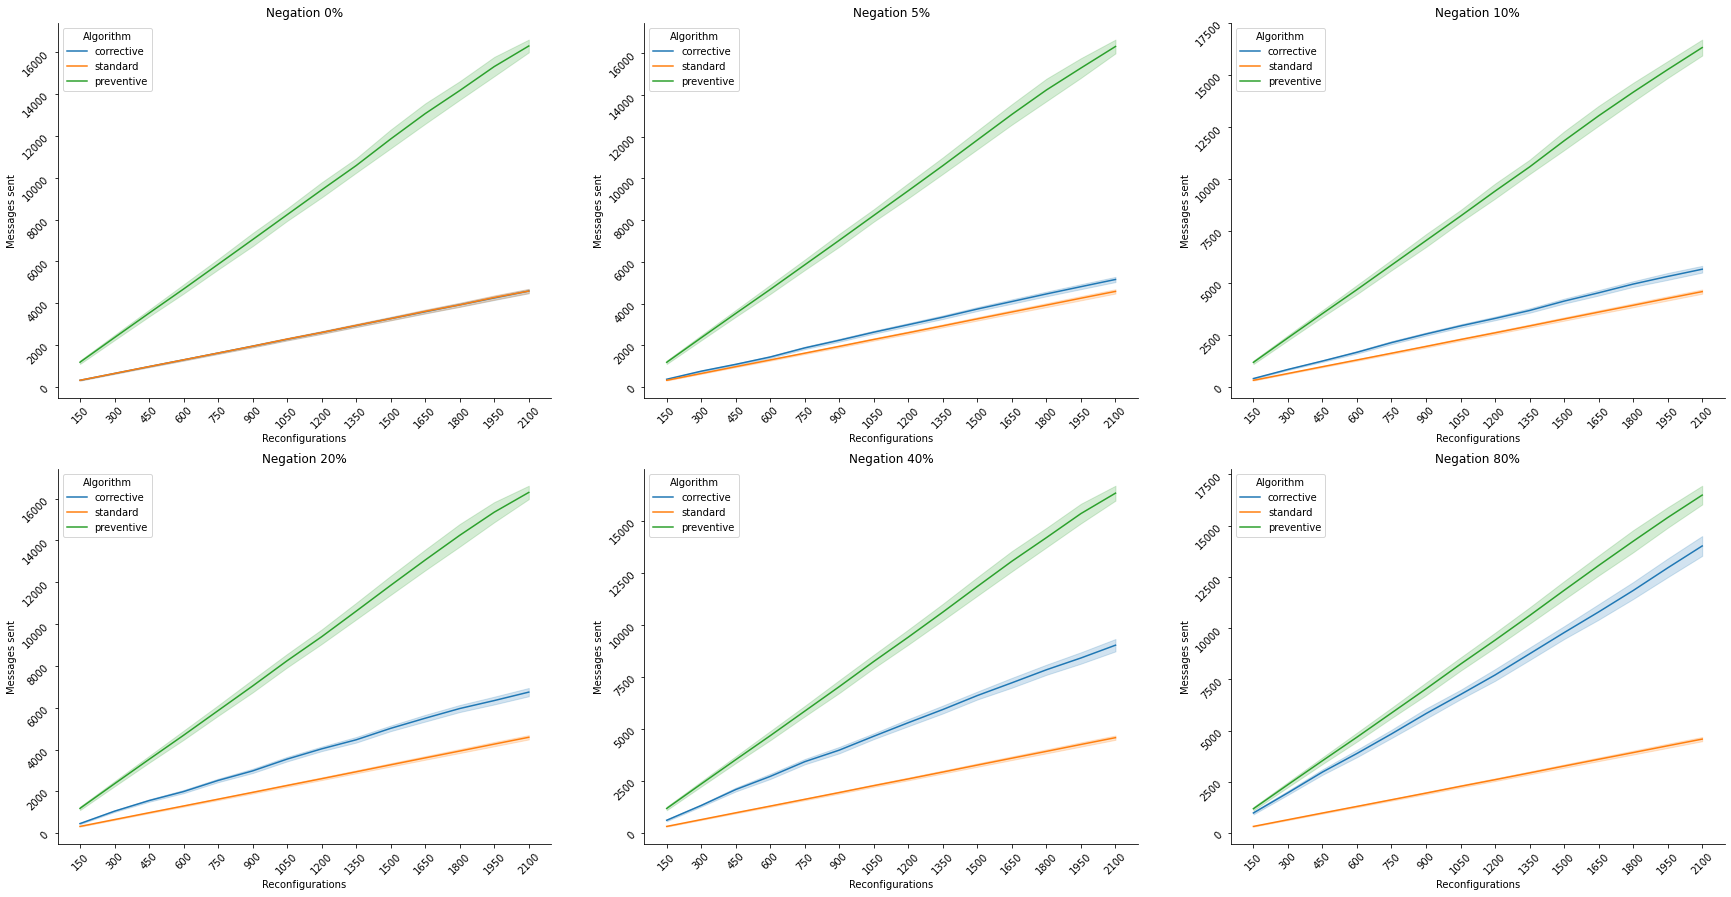

In [13]:
metric = 'messages_sent'
type_exp = 'concurrent'
label = 'Messages sent'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.3 Plot Overhead Data Structure

#### 2.3.1 Ideal conditions

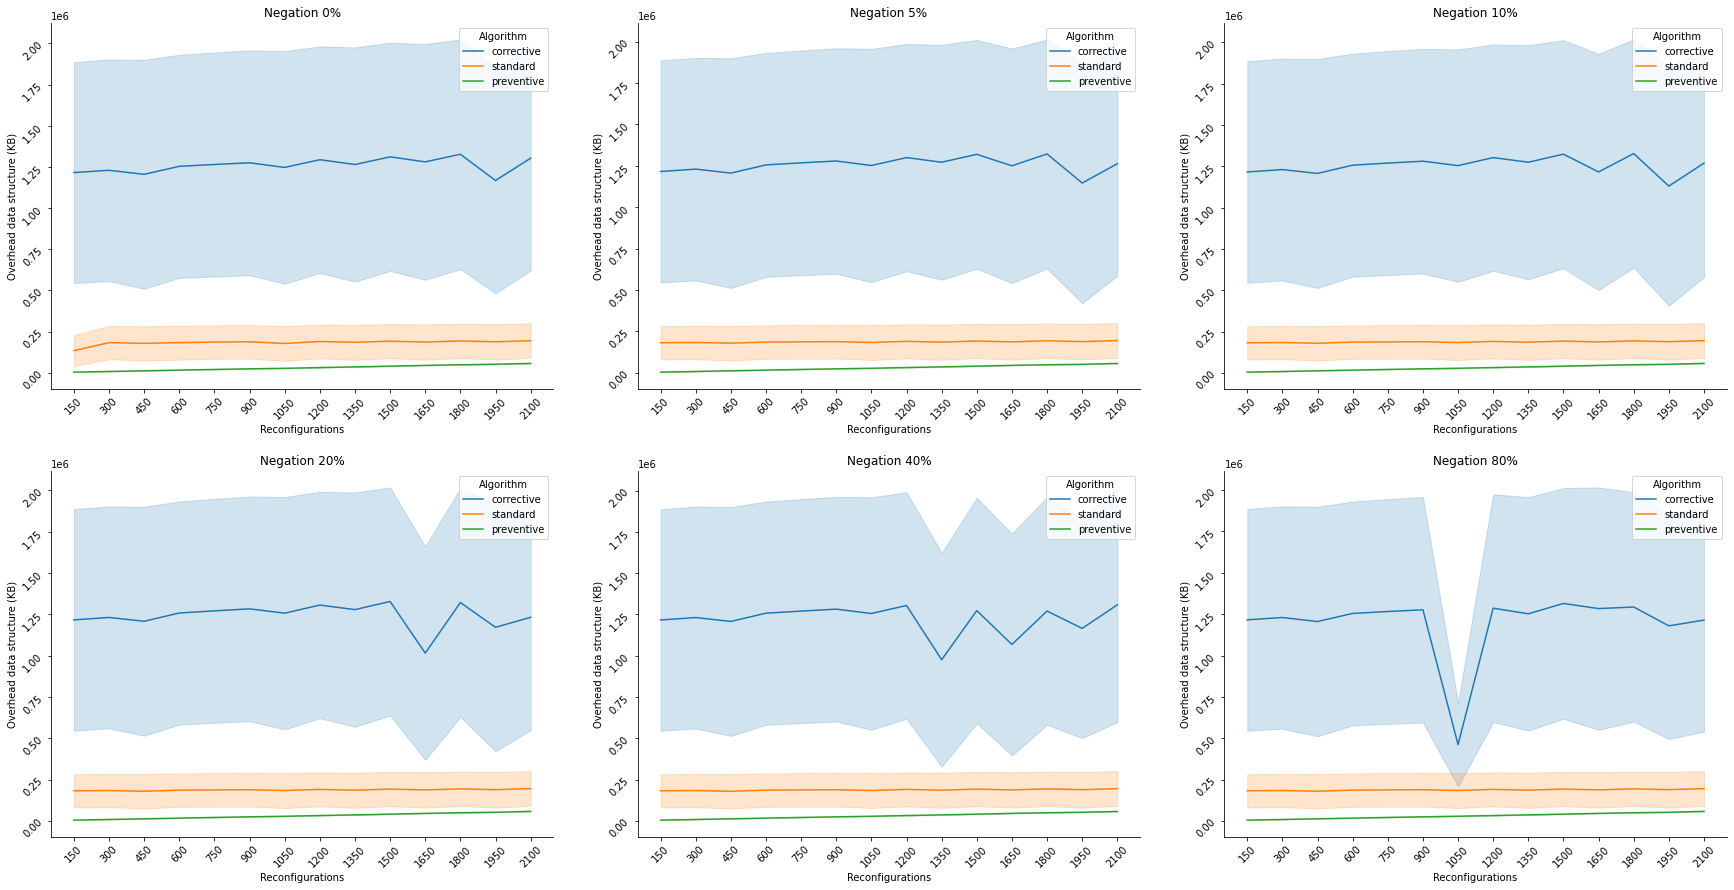

In [14]:
metric = 'overhead_data_structure'
type_exp = 'concurrent'
label = 'Overhead data structure (KB)'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.3.2 Middle conditions

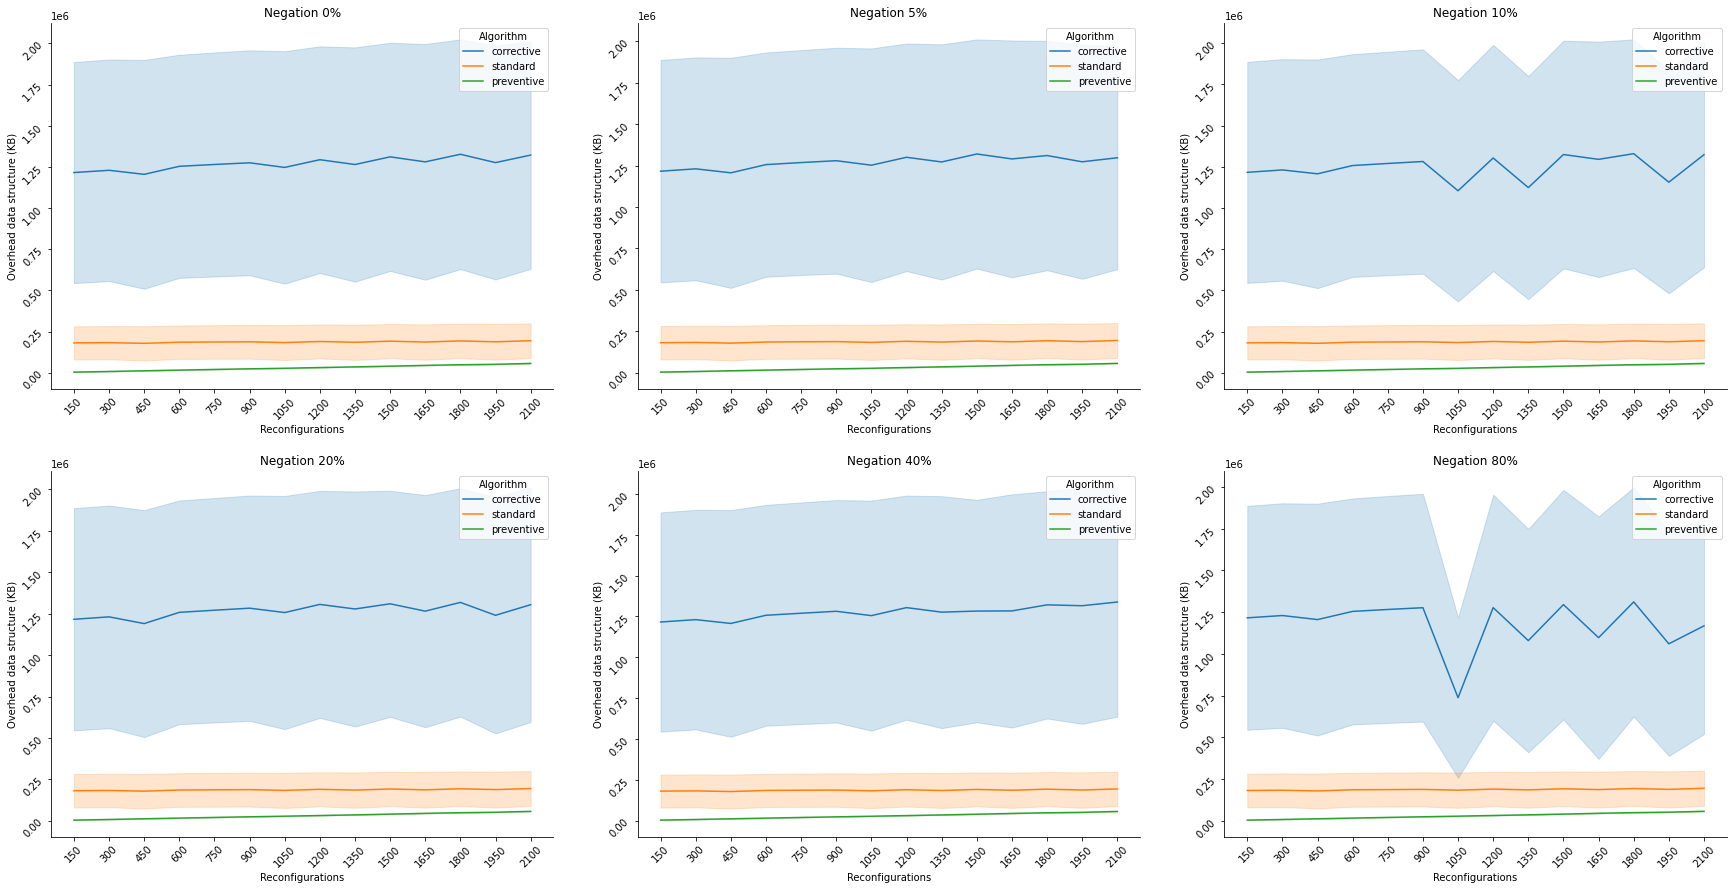

In [15]:
metric = 'overhead_data_structure'
type_exp = 'concurrent'
label = 'Overhead data structure (KB)'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.3.3 Worst conditions

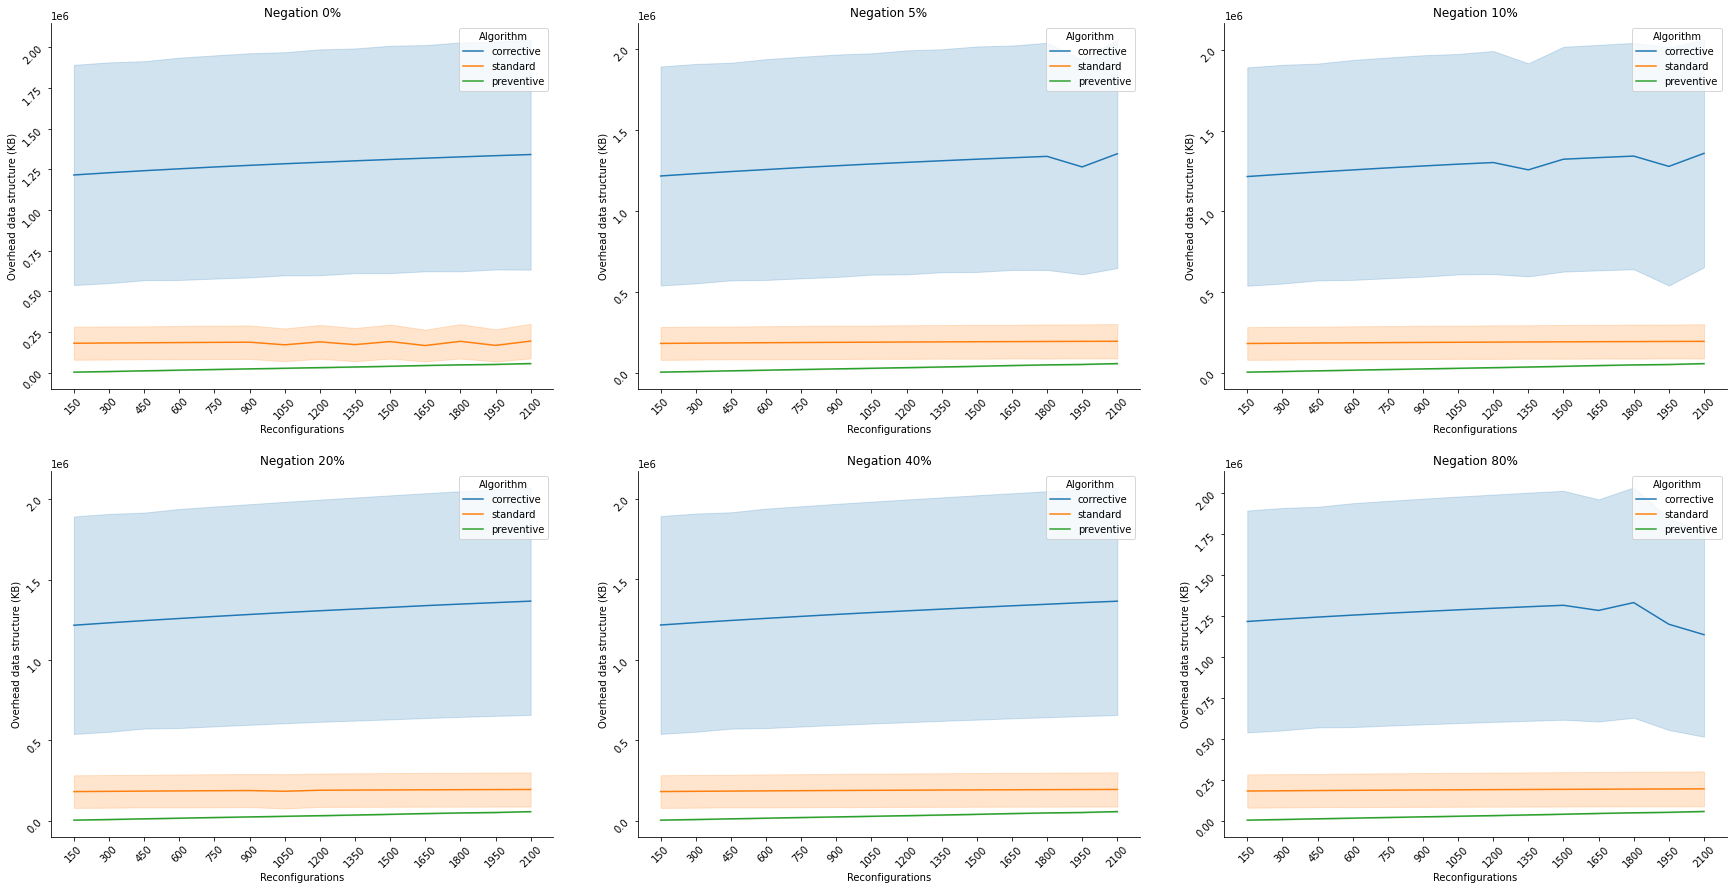

In [16]:
metric = 'overhead_data_structure'
type_exp = 'concurrent'
label = 'Overhead data structure (KB)'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.4 Plot Latency per Operation

#### 2.4.1 Ideal conditions

/tmp/ipykernel_38887/2192191416.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)


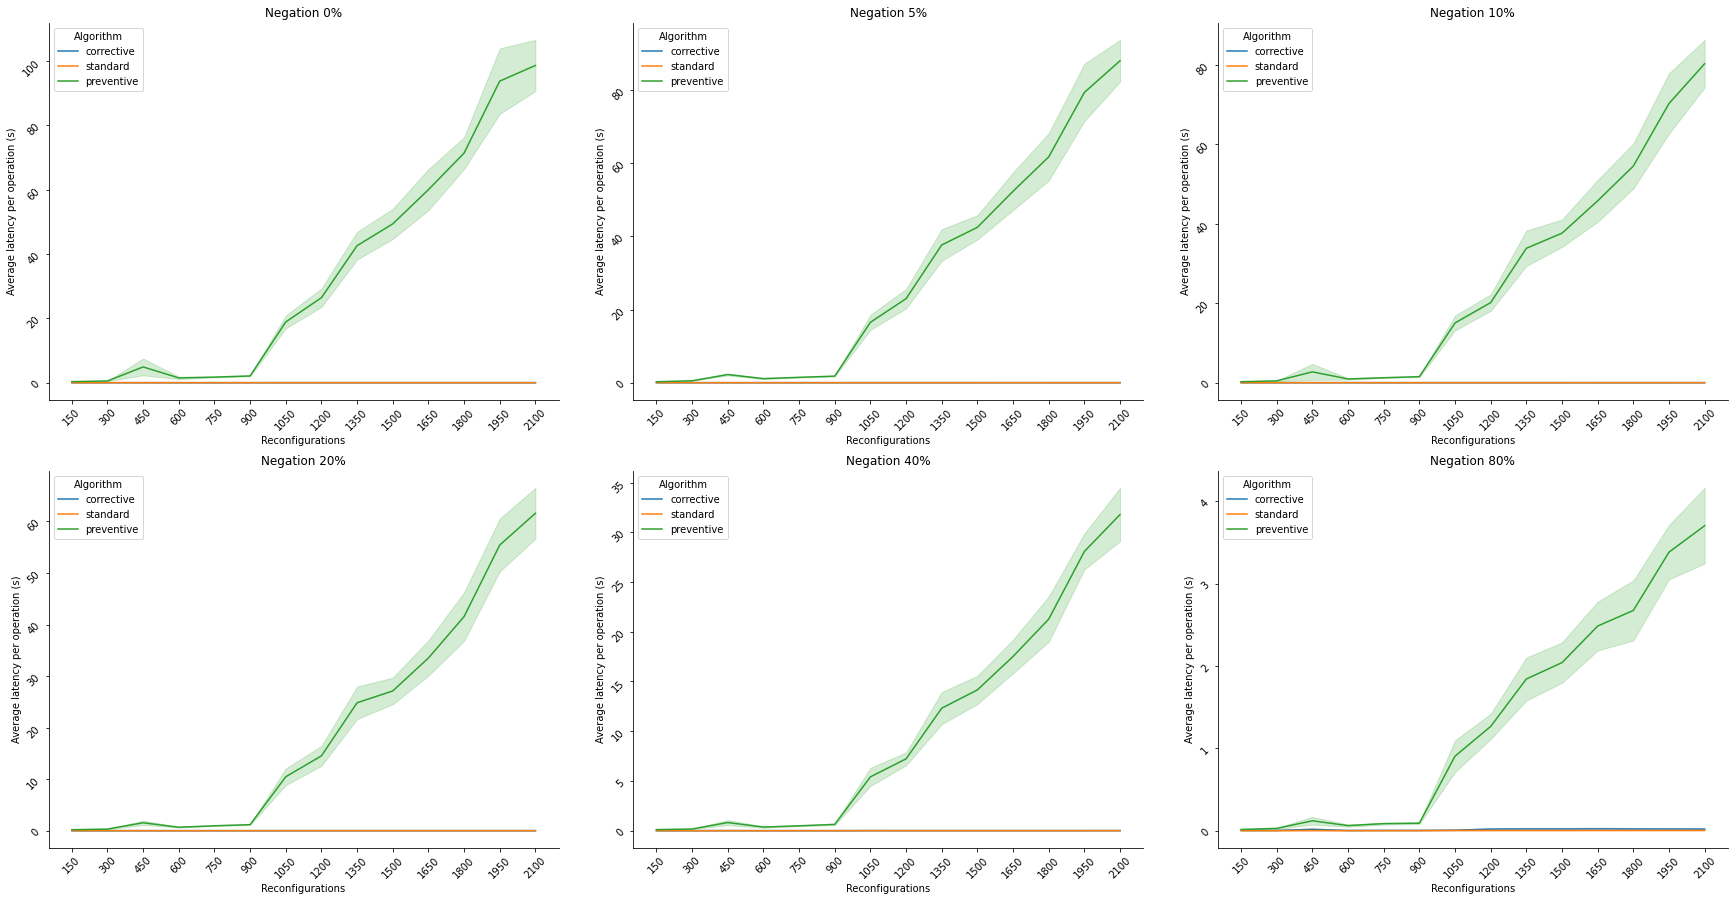

In [17]:
metric = 'latency_per_operation'
label = 'Average latency per operation (s)'
type_exp = 'concurrent'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

# Divide the values by number of updates as we recorded the total latency spent in reconfigurations
mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.4.2 Middle conditions

/tmp/ipykernel_38887/2000339910.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)


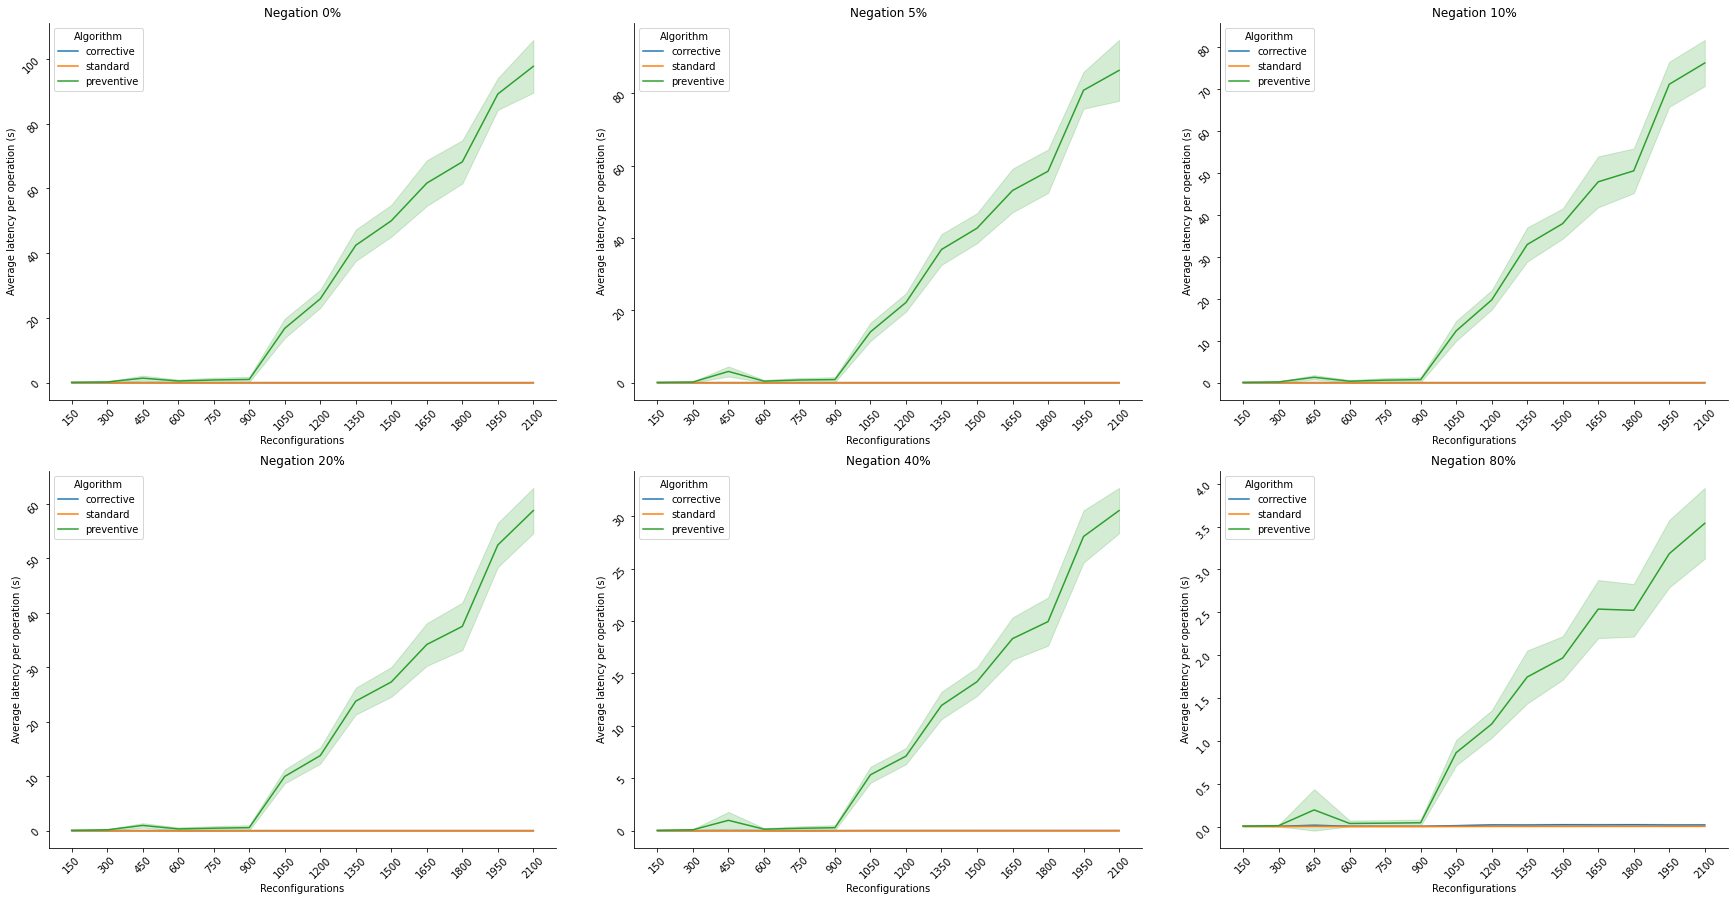

In [18]:
metric = 'latency_per_operation'
label = 'Average latency per operation (s)'
type_exp = 'concurrent'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

# Divide the values by number of updates as we recorded the total latency spent in reconfigurations
mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.4.3 Worst conditions

/tmp/ipykernel_38887/2918984074.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)


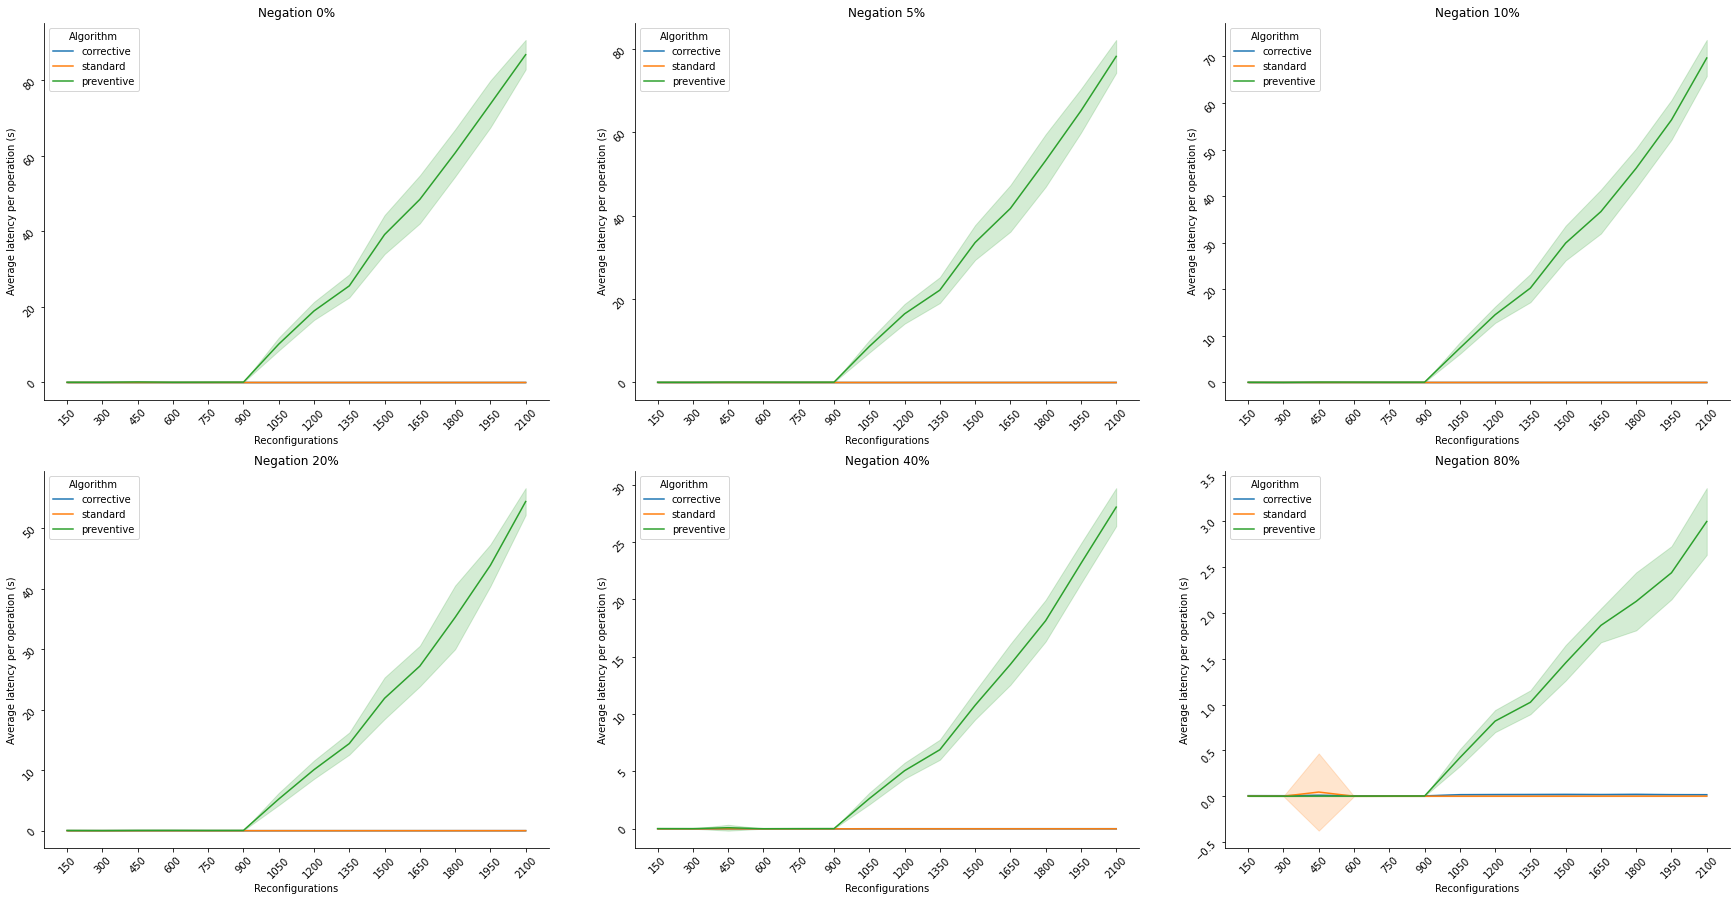

In [19]:
metric = 'latency_per_operation'
label = 'Average latency per operation (s)'
type_exp = 'concurrent'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

# Divide the values by number of updates as we recorded the total latency spent in reconfigurations
mid_results[metric] = mid_results[metric] / mid_results['update'].astype(float)

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.5 Plot number of reconfigurations

#### 2.5.1 Ideal conditions

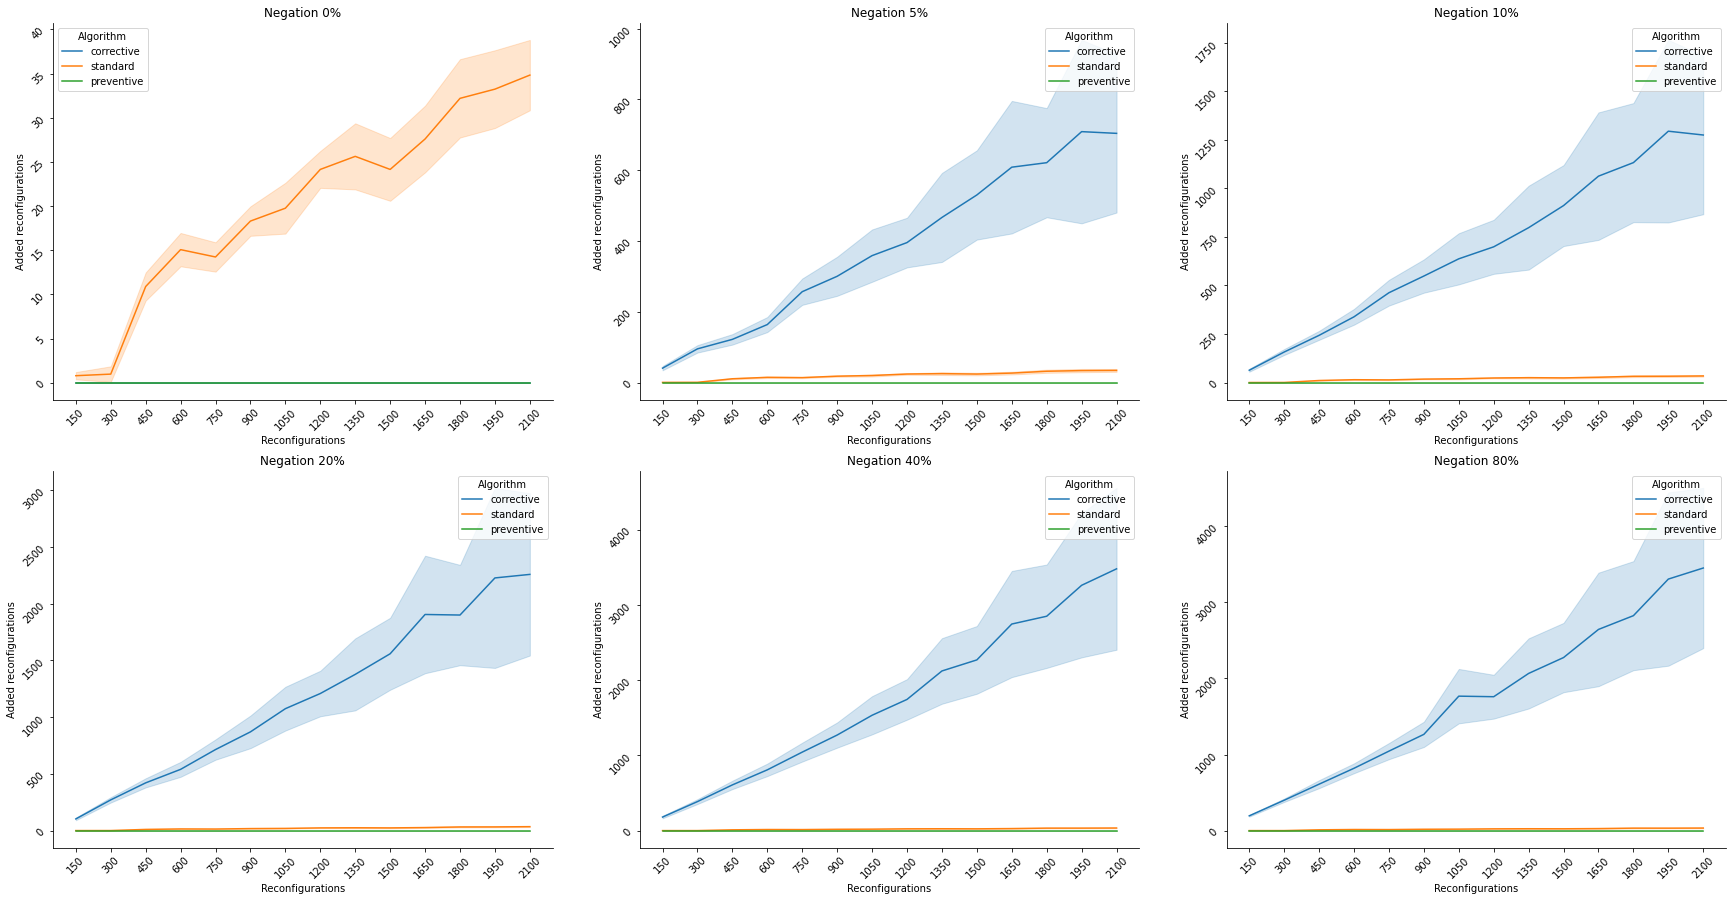

In [20]:
metric = 'number_of_reconfigurations'
label = 'Added reconfigurations'
type_exp = 'concurrent'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.5.2 Middle conditions

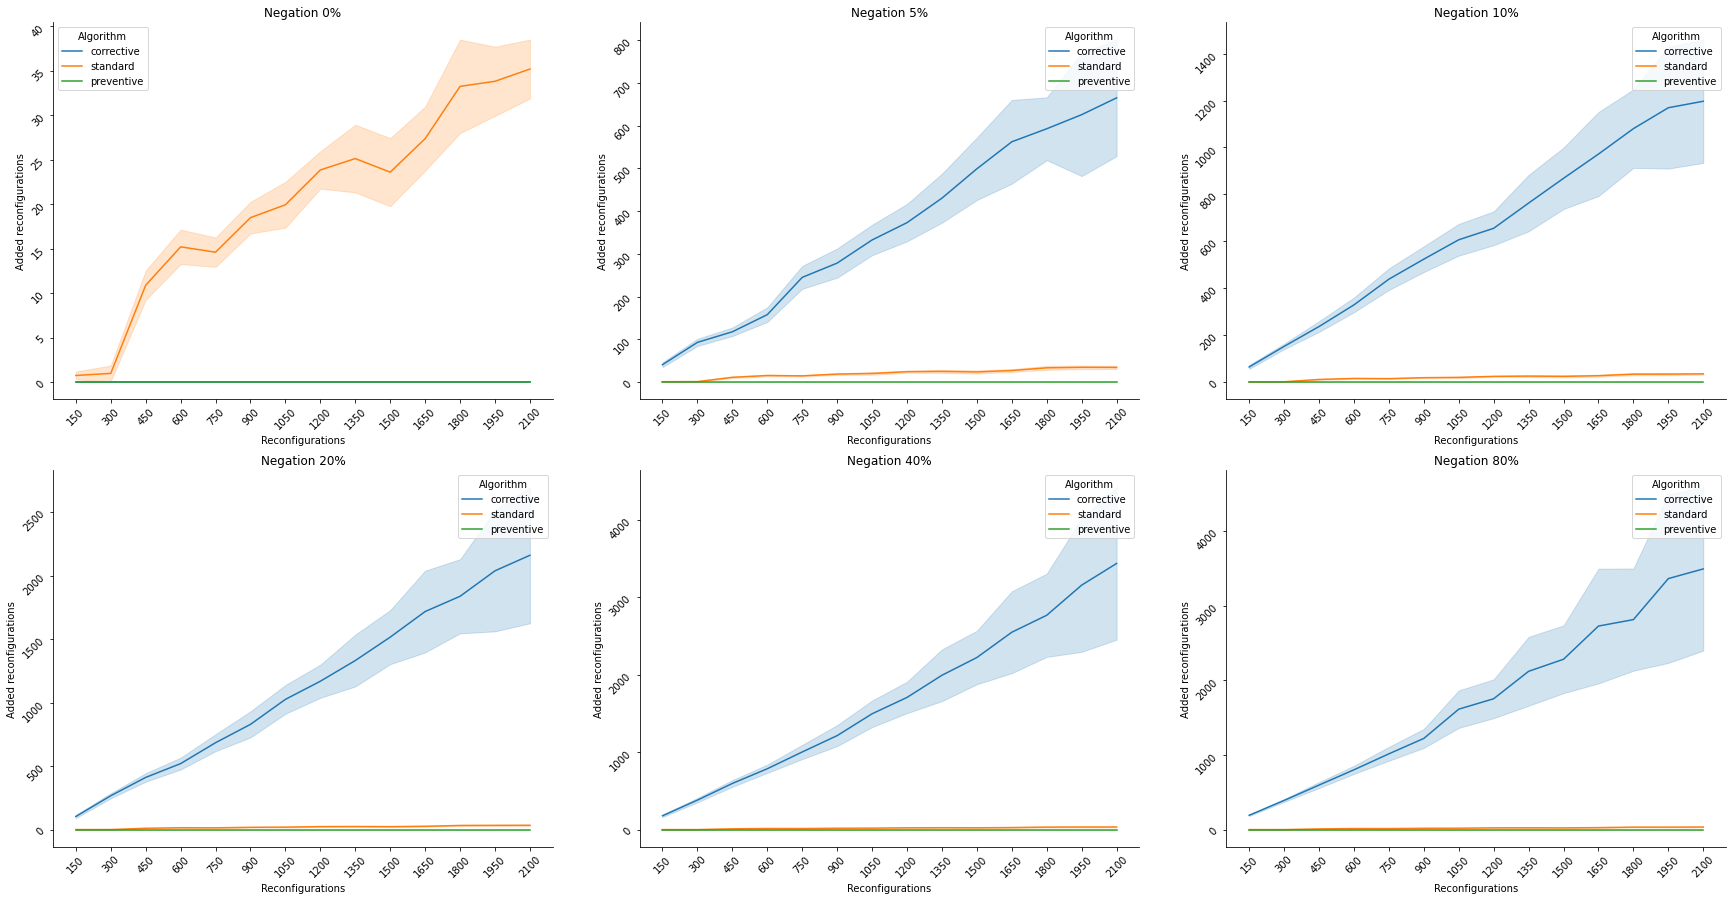

In [21]:
metric = 'number_of_reconfigurations'
label = 'Added reconfigurations'
type_exp = 'concurrent'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.5.3 Worst conditions

In [ ]:
metric = 'number_of_reconfigurations'
label = 'Added reconfigurations'
type_exp = 'concurrent'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]


first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.6 Total reconfiguration time

#### 2.6.1 Ideal conditions

In [ ]:
metric = 'total_reconfiguration_time'
label = 'Total reconfiguration time (s)'
type_exp = 'concurrent'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.6.2 Middle conditions

In [ ]:
metric = 'total_reconfiguration_time'
label = 'Total reconfiguration time (s)'
type_exp = 'concurrent'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.6.3 Worst conditions

In [ ]:
metric = 'total_reconfiguration_time'
label = 'Total reconfiguration time (s)'
type_exp = 'concurrent'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

### 2.7 Plot inconsistencies

#### 2.7.1 Ideal conditions

In [ ]:
metric = 'inconsistencies'
label = 'Inconsistencies'
type_exp = 'concurrent'
condition = 'ideal'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.7.2 Middle conditions

In [ ]:
metric = 'inconsistencies'
label = 'Inconsistencies'
type_exp = 'concurrent'
condition = 'middle'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)

#### 2.7.3 Worst conditions

In [ ]:
metric = 'inconsistencies'
label = 'Inconsistencies'
type_exp = 'concurrent'
condition = 'worst'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp +'_' + condition + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

mid_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

first_condition = (mid_results['inconsistencies'] == 0) & (mid_results['Algorithm'].isin(['preventive', 'corrective']))
second_condition = mid_results['Algorithm'] == 'standard'

# Clean the data from errors, whenever there were errors inconsistencies were registered because the processes did not finish sucessfully
mid_results_filtered = mid_results[first_condition | second_condition]
plot_results(mid_results_filtered, metric, string_name_png, string_name_eps, label)